In [21]:
# imports

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [39]:
# get the btc price
df = yf.download('ETH-USD')

[*********************100%%**********************]  1 of 1 completed


In [40]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
2017-11-14,316.763000,340.177002,316.763000,337.631012,337.631012,1069680000
2017-11-15,337.963989,340.911987,329.812988,333.356995,333.356995,722665984
2017-11-16,333.442993,336.158997,323.605988,330.924011,330.924011,797254016
2017-11-17,330.166992,334.963989,327.523010,332.394012,332.394012,621732992


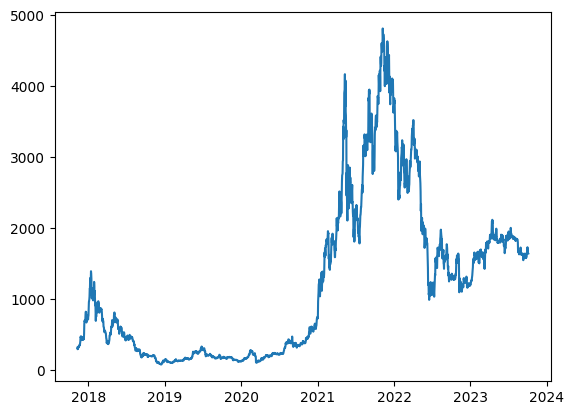

In [41]:
# visualize BTC price
plt.plot(df.index, df['Adj Close'])

In [42]:
# Train, test, split
to_row = int(len(df)*0.9)

# training data
training_data = list(df[0:to_row]['Adj Close'])

# testing data
testing_data = list(df[to_row:]['Adj Close'])

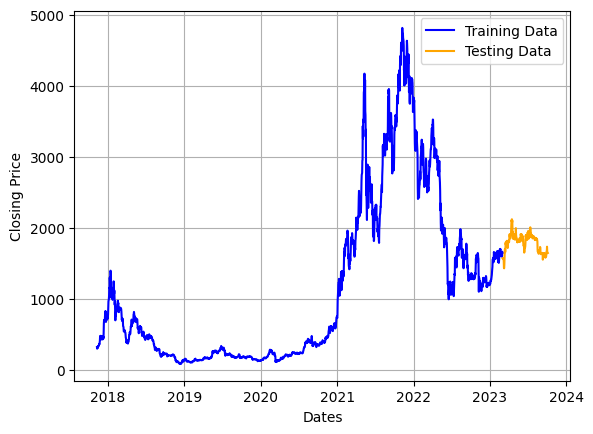

In [43]:
# let's visualize training and testing data
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Price')
plt.plot(df[0:to_row]['Adj Close'], 'blue', label='Training Data')
plt.plot(df[to_row:]['Adj Close'], 'orange', label='Testing Data')
plt.legend()

In [44]:
model_predictions = [] # to store model predictions
number_test_observations = len(testing_data)

In [45]:
# fit and predict
for i in range(number_test_observations):
    model = ARIMA(training_data, order=(4,1,0)) # 4,1,0 p,d,q values
    model_fit = model.fit() # fit the model
    output = model_fit.forecast() # predict
    yhat = output[0] # get output
    model_predictions.append(yhat) # store output
    actual_test_value = testing_data[i] # test value
    training_data.append(actual_test_value) # update test value

In [46]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2155
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -12356.194
Date:                Wed, 04 Oct 2023   AIC                          24722.387
Time:                        20:52:06   BIC                          24750.763
Sample:                             0   HQIC                         24732.767
                               - 2155                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0655      0.011     -5.922      0.000      -0.087      -0.044
ar.L2          0.0132      0.010      1.332      0.183      -0.006       0.033
ar.L3          0.0329      0.011      3.047      0.0

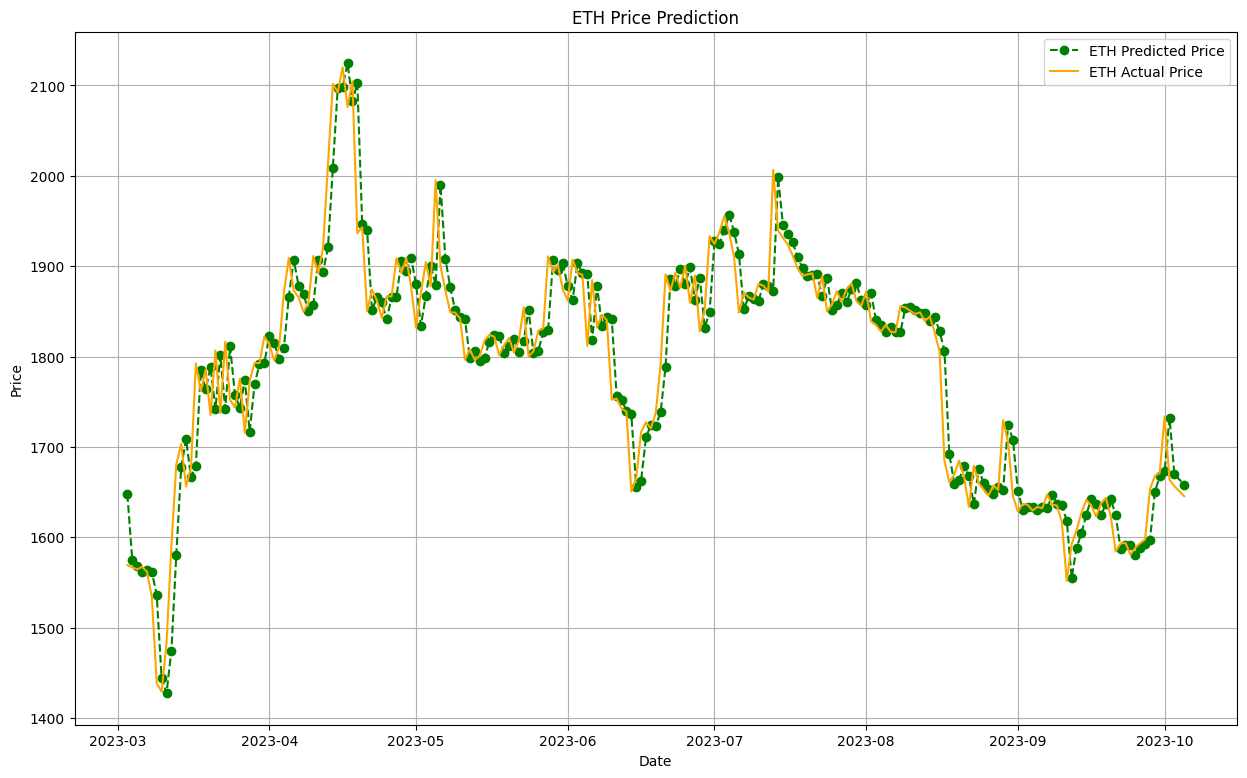

In [48]:
# let's visualize the results
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = df[to_row:].index

plt.plot(date_range,
         model_predictions,
         color='green',
         marker='o',
         linestyle='dashed',
         label='ETH Predicted Price')

plt.plot(date_range,
         testing_data,
         color='orange',
         label='ETH Actual Price')

plt.title('ETH Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [50]:
# report performance
MAPE = np.mean(np.abs(np.array(model_predictions) - np.array(testing_data))/np.abs(testing_data))

print('MAPE: ' + str(MAPE))

MAPE: 0.015657136286598154


In [51]:
# 1.5% MAPE means that the model is accurate (98.5% accuracy)